<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 ニューラルネットワーク

多層ニューラルネットワークでの識別をKerasでコーディングします。

## 準備

必要なライブラリ等を読み込みます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## データの読み込み

MNISTデータは手描き数字画像認識のためのデータセットです。学習用60000事例、評価用10000事例で、それぞれ28x28の行列で画像が表現されています。

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

パターン行列からデータを1つ取り出して、pyplotで表示します。

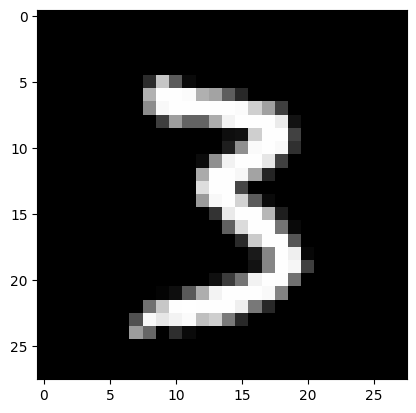

In [ ]:
plt.gray()
plt.imshow(X_train[130])

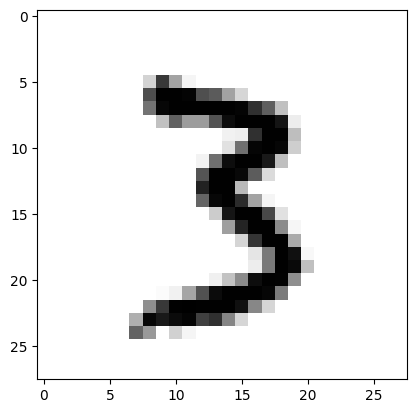

In [ ]:
plt.imshow(255 - X_train[130])

正解ベクトルの最初の20要素程度を表示させて、どのようにデータが並んでいるのかを確認します。

In [ ]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

入力値のとりうる範囲を0-255から0-1に変換します。

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

正解をone-hotベクトルに変換します。

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

3層のフィードフォワード型ネットワークで学習します。

*   入力層は28x28の2次元画像を784次元の1次元ベクトルに変換 (Flatten)します
*   中間層は128個のユニットで、活性化関数はシグモイド関数です
*   出力層のユニット数はクラス数に合わせて10個で、活性化関数はすべての出力値の合計が1になるようにしたsoftmax関数です



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10,  activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。

In [ ]:
model.fit(X_train, y_train, batch_size=200, epochs=3)

Epoch 1/3
300/300 [==============================] - 7s 4ms/step - loss: 0.7249 - acc: 0.8329
Epoch 2/3
300/300 [==============================] - 1s 4ms/step - loss: 0.3171 - acc: 0.9133
Epoch 3/3
300/300 [==============================] - 1s 3ms/step - loss: 0.2552 - acc: 0.9282


評価用データで評価します。

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2300 - acc: 0.9353
Accuracy: 0.94


## 練習問題

活性化関数sigmoid、最適化器sgd（最急勾配法）で多階層ネットワークを構成し、勾配消失のために学習が進まないことを確認してください。次に、活性化関数を変更して、学習がうまくできることを確認してください。余力があれば、最適化器入れ替えの効果についても確認してください。


### 解答例


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## データの読み込み

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

入力値のとりうる範囲を0-255から0-1に変換します。

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

正解をone-hotベクトルに変換します。

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## ニューラルネットワークの構造と学習時のハイパーパラメータの設定

6層のフィードフォワード型ネットワークで学習します。

In [ ]:
af = 'sigmoid'
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(10,  activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 151306 (591.04 KB)
Trainable params: 151

損失関数と最適化器を指定します。metricsは学習時に表示される数値で、学習が進んでいることを確認できるように設定します。

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

ミニバッチのサイズと、繰り返し数を指定して学習を行います。lossやaccがほとんど変化しないことを確認してください。

In [ ]:
model.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 [==============================] - 2s 4ms/step - loss: 2.3145 - acc: 0.1104
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 2.3014 - acc: 0.1144
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 2.3014 - acc: 0.1131
Epoch 4/5
300/300 [==============================] - 1s 3ms/step - loss: 2.3013 - acc: 0.1124
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 2.3011 - acc: 0.1133


評価用データで評価します。

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2}")

313/313 [==============================] - 1s 4ms/step - loss: 2.3008 - acc: 0.1135
Accuracy: 0.11


10クラス問題で正解率が10%程度なので、まったく学習ができていないことがわかります。

活性化関数を変更します。学習が進んでいる様子を確認してください。

In [ ]:
af = 'relu'

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(10,  activation='softmax')
])

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [ ]:
model2.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 [==============================] - 2s 4ms/step - loss: 1.9418 - acc: 0.4569
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.7580 - acc: 0.7987
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 0.4579 - acc: 0.8694
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.3766 - acc: 0.8926
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.3348 - acc: 0.9038


In [ ]:
score = model2.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3079 - acc: 0.9097
Accuracy: 0.91


もとのネットワークで、最適化器のみ変更してみます。

In [ ]:
af = 'sigmoid'
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(10,  activation='softmax')
])

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model3.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 [==============================] - 3s 5ms/step - loss: 1.2240 - acc: 0.6172
Epoch 2/5
300/300 [==============================] - 1s 5ms/step - loss: 0.3617 - acc: 0.9054
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.2294 - acc: 0.9385
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1695 - acc: 0.9529
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1381 - acc: 0.9615


In [ ]:
score = model3.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1510 - acc: 0.9563
Accuracy: 0.96


活性化関数と最適化器の両方を変えてみます。

In [ ]:
af = 'relu'

model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(128, activation=af),
    tf.keras.layers.Dense(10,  activation='softmax')
])

In [ ]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model4.fit(X_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
300/300 [==============================] - 3s 4ms/step - loss: 0.3372 - acc: 0.9031
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1244 - acc: 0.9621
Epoch 3/5
300/300 [==============================] - 1s 5ms/step - loss: 0.0859 - acc: 0.9731
Epoch 4/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0639 - acc: 0.9803
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0511 - acc: 0.9842


In [ ]:
score = model4.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]:.2}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0880 - acc: 0.9750
Accuracy: 0.98


適切に設定を行うと、学習効率が上がることがわかります。